# Tutorial: Erdumrundung mit unsicherem Passagiergewicht

In diesem Tutorial untersuchen wir das Szenario einer Erdumrundung ohne Auftanken mit unsicherem Passagiergewicht.  Für diese Aufgabe geeignete Flieger sind leicht. Daher hat das Gewicht der Crew einen Einfluss auf die Reichweite.  Die *Formel von Breguet*

$$
R = C \ln \left(\frac{m_{\textrm{Flugzeug}} + m_{\textrm{Crew}} + m_{\textrm{Brennstoff}}}{m_{\textrm{Flugzeug}} + m_\textrm{Crew}} \right)
$$

berechnet die Reichweite $ R $ eines Propellerflugzeugs. Die Startmasse setzt sich aus dem Flugzeuggewicht, dem Gewicht der Crew und dem Brennstoffgewicht zusammen. Da der Brennstoff während des Fluges verbraucht wird, trägt er nicht zur Endmasse bei. Das Gewicht des Flugzeugs mit allem Equipment beträgt $m_{\textrm{Flugzeug}} = 900\,$ kg. Für das betrachtete Flugzeug gilt $C= 10^4\,$ km. Neben der Pilotin wird noch ein weiterer Passagier an dem Flug teilnehmen. Da der Flug in einem Preisausschreiben verschenkt wird, ist dessen Identität aktuell unbekannt. Die einzige Vorgabe an den Passagier ist, dass nur Handgepäck mit dem üblichen Gewicht mitgenommen werden darf. <br>

## Gesamtaufgabe:
Sie als Ingenieur_in sollen die benötigte Treibstoffmenge ermitteln. Da das Gewicht der Crew unbekannt ist, kann kein exakter Wert bestimmt werden. Stattdessen soll eine *Unsicherheitsquantifizierung* erfolgen. Zur Verfügung steht Ihnen die *Formel von Breguet*, außerdem beherrschen Sie die *Monte Carlo Methode*.

### 1. Modellierung der Unsicherheit im Gewicht der Crew

Das Gewicht der Pilotin ist bekannt und beträgt $71\,$ kg. Die unbekannten Größen sind das Gewicht des zusätzlichen Passagiers und seines Handgepäcks. <br>
Modellieren Sie die unbekannte Masse der Crew als Zufallsvariable. <br>

* #### Gegeben 
$m_{\textrm{Pilotin}} = 71\,$ kg

* #### Anzupassende Darstellung des Gesamtgewichts der Crew

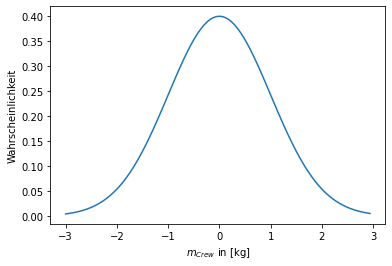

In [5]:
# Import der notwendigen Module 
%run import_modules.ipynb

mu = 0 # Mittelwert
sigma_2 = 1 # Varianz
sigma = sqrt(sigma_2) # Standardabweichung

# Plotten der Verteilung des Gesamtgewichts der Crew
plot_crew_distribution(mu, sigma)

### 2. Monte Carlo Simulation
Für eine Erdumrundung müssen Sie eine Strecke von ungefähr $s = 25000\,$ km zurücklegen können. Bei bisherigen Flügen dieser Art hat sich eine Brennstoffmasse von $\hat{m}_{\textrm{Brennstoff}} = 12000\,$ kg bewährt. Sie wollen nun mithilfe einer *Monte Carlo Simulation* ausrechnen, mit welcher Wahrscheinlichkeit der Erfahrungswert $\hat{m}_{\textrm{Brennstoff}}$ ausreicht. Im Rahmen der *Monte Carlo Simulation* werden verschiedene Gewichte von möglichen Passagieren anhand der im ersten Aufgabenteil modellierten Verteilung simuliert. Für jedes simulierte Gewicht wird die Reichweite berechnet. Ist sie größer als $s = 25000\,$ km, ist der Brennstoff ausreichend. In diesem Fall ist einen Erfolg zu verbuchen, ansonsten einen Misserfolg. Die Wahrscheinlichkeit ergibt sich dann näherungsweise aus der relativen Häufigkeit eines Erfolges. Die nachfolgende Zelle visualisiert das Vorgehen.

* #### Gegeben
$C= 10^4\,$ km, $s = 25000\,$ km, $m_{\textrm{Flugzeug}} = 900\,$ kg, $\hat{m}_{\textrm{Brennstoff}} = 12000\,$ kg, Modellierung von $ m_{\textrm{Crew}} $ aus Teilaufgabe 1

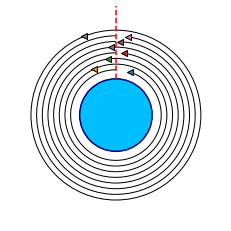

4 Erfolge und 4 Misserfolge
Relative Häufigkeit eines Erfolges: 0.5


In [6]:
# Visualisierung des MC Verfahrens
visualization_MC_airplanes()

* #### Platz für die Implementierung 

Benötigte Befehle:
* $if a > b:$ fragt ab, ob $a$ größer als $b$ ist. 
* $1ex$ entspricht dem Ausdruck $10^x$. 
* $a+=b$ entspricht dem Ausdruck $a = a + b$
* $ gauss(mu, sigma) $ erzeugt zufällig eine Zahl. Dabei liegt eine Normalverteilung mit dem Mittelwert $mu$ und der Standardabweichung $sigma$ zu Grunde.
* $ log(x) $ berechnet den natürlichen Logarithmus von $x$.

In [7]:
def MC_airplanes(m_Brennstoff):    
    # Zu Beginn ist die absolute Häufigkeit eines Erfolgs gleich Null
    H_Erfolg = 0    # die Variable H_Erfolg speichert die Häufigkeit eines Erfolgs
    m_Flugzeug = 900
    N = 1  # Wir simulieren N Flüge mit unterschiedlichen Gewichten der Crew

    ### AN DIESER STELLE SOLL DIE MC-SIMULATION ERFOLGEN ###

    # Wir müssen noch durch die Anzahl an Simulationen teilen, um die relative Häufigkeit zu erhalten
    h_Erfolg = 0
    
    print_results(N, H_Erfolg, h_Erfolg)

# Interaktiver Slider
interact(MC_airplanes, m_Brennstoff=IntSlider(min=11400, max=12400, step=50, value=12000));

interactive(children=(IntSlider(value=12000, description='m_Brennstoff', max=12400, min=11400, step=50), Outpu…

### 3. Modifizierung der Brennstoffmasse
Ändern Sie die Treibstoffmasse, bis Sie die Erde in mindestens $ 99,9 $ Prozent der Fälle umrunden können.